# Quantity - Rescaling Methods Comparison

## Overview

This notebook implements and compares three rescaling methods for the **Quantity** attribute:
1. **Min-Max Normalization**
2. **Z-Score Standardization**
3. **Robust Scaling**

## Source Dataset

**Input:** `handle_missing_data/output_data/4_discount_applied/final_cleaned_dataset.csv`
- 11,971 rows (after missing data handling)
- All missing values resolved
- Mathematical consistency validated

## Quantity Characteristics

- **Type:** Discrete count data
- **Range:** Typically 1-20 items per transaction
- **Distribution:** Right-skewed
- **Recommendation:** Robust Scaling (handles outliers and skew)


## Step 1: Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Configuration
INPUT_CSV = Path('../../output/1_handle_missing_data/final_cleaned_dataset.csv')
OUTPUT_DIR = Path('../../output/3_handle_rescale_data')
QUANTITY_COLUMN = 'Quantity'

# Create output directory
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Input file: {INPUT_CSV}")
print(f"Output directory: {OUTPUT_DIR}")

In [4]:
# Load the cleaned dataset
df = pd.read_csv(INPUT_CSV)
data = df.copy()
data.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_1002182,CUST_01,Food,Item_5_FOOD,11.0,5.0,55.0,Digital Wallet,In-store,2024-10-08,True
1,TXN_1003865,CUST_15,Furniture,Item_2_FUR,6.5,5.0,32.5,Cash,Online,2022-03-12,False
2,TXN_1003940,CUST_06,Furniture,Item_5_FUR,11.0,9.0,99.0,Digital Wallet,Online,2022-04-22,False
3,TXN_1004091,CUST_04,Food,Item_25_FOOD,41.0,3.0,123.0,Cash,In-store,2023-11-09,False
4,TXN_1004124,CUST_08,Computers and electric accessories,Item_7_CEA,14.0,5.0,70.0,Credit Card,In-store,2022-03-02,Unknown


## Step 2: Exploratory Data Analysis - Quantity

In [ ]:
# Basic statistics
print("QUANTITY - Descriptive Statistics")
print(f"\n{data[QUANTITY_COLUMN].describe()}")

# Additional statistics
print(f"\nMissing values: {data[QUANTITY_COLUMN].isna().sum()}")
print(f"Unique values: {data[QUANTITY_COLUMN].nunique()}")
print(f"\nValue counts (top 10):")
print(data[QUANTITY_COLUMN].value_counts().head(10))

In [ ]:
# Outlier detection using IQR method
Q1 = data[QUANTITY_COLUMN].quantile(0.25)
Q3 = data[QUANTITY_COLUMN].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = data[(data[QUANTITY_COLUMN] < lower_fence) | (data[QUANTITY_COLUMN] > upper_fence)]

print("OUTLIER DETECTION (IQR Method)")
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower fence: {lower_fence}")
print(f"Upper fence: {upper_fence}")
print(f"\nNumber of outliers: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")
print(f"\nOutlier range: {outliers[QUANTITY_COLUMN].min()} to {outliers[QUANTITY_COLUMN].max()}")

In [ ]:
# Visualize original distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(data[QUANTITY_COLUMN], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Quantity - Histogram', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')
axes[0].axvline(data[QUANTITY_COLUMN].mean(), color='red', linestyle='--', label=f'Mean: {data[QUANTITY_COLUMN].mean():.2f}')
axes[0].axvline(data[QUANTITY_COLUMN].median(), color='green', linestyle='--', label=f'Median: {data[QUANTITY_COLUMN].median():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(data[QUANTITY_COLUMN], vert=True)
axes[1].set_title('Quantity - Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Quantity')
axes[1].axhline(upper_fence, color='red', linestyle='--', label=f'Upper Fence: {upper_fence:.2f}')
axes[1].axhline(lower_fence, color='red', linestyle='--', label=f'Lower Fence: {lower_fence:.2f}')
axes[1].legend()

# Distribution plot
data[QUANTITY_COLUMN].plot(kind='kde', ax=axes[2], color='purple')
axes[2].set_title('Quantity - Density Plot', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Quantity')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

print("\nDistribution Analysis:")
print(f"Right-skewed distribution (mean > median)")
print(f"Outliers present beyond upper fence ({upper_fence:.2f})")
print(f"Discrete count data (integer values)")

## Step 3: Apply Rescaling Methods

We will apply all three methods and compare them.

### Method 1: Min-Max Normalization

In [ ]:
# Min-Max Normalization
min_max_scaler = MinMaxScaler()
data['Quantity_Normalized'] = min_max_scaler.fit_transform(data[[QUANTITY_COLUMN]])

print("MIN-MAX NORMALIZATION")
print(f"\nStatistics:")
print(data['Quantity_Normalized'].describe())

print(f"\nExample transformations:")
print(data[[QUANTITY_COLUMN, 'Quantity_Normalized']].head(10))

### Method 2: Z-Score Standardization

In [ ]:
# Z-Score Standardization
standard_scaler = StandardScaler()
data['Quantity_Standardized'] = standard_scaler.fit_transform(data[[QUANTITY_COLUMN]])

print("Z-SCORE STANDARDIZATION")
print(f"\nStatistics:")
print(data['Quantity_Standardized'].describe())

print(f"\nExample transformations:")
print(data[[QUANTITY_COLUMN, 'Quantity_Standardized']].head(10))

### Method 3: Robust Scaling

In [ ]:
# Robust Scaling
robust_scaler = RobustScaler()
data['Quantity_Robust'] = robust_scaler.fit_transform(data[[QUANTITY_COLUMN]])

print("ROBUST SCALING")
print(f"\nStatistics:")
print(data['Quantity_Robust'].describe())

print(f"\nExample transformations:")
print(data[[QUANTITY_COLUMN, 'Quantity_Robust']].head(10))

## Step 4: Compare All Methods

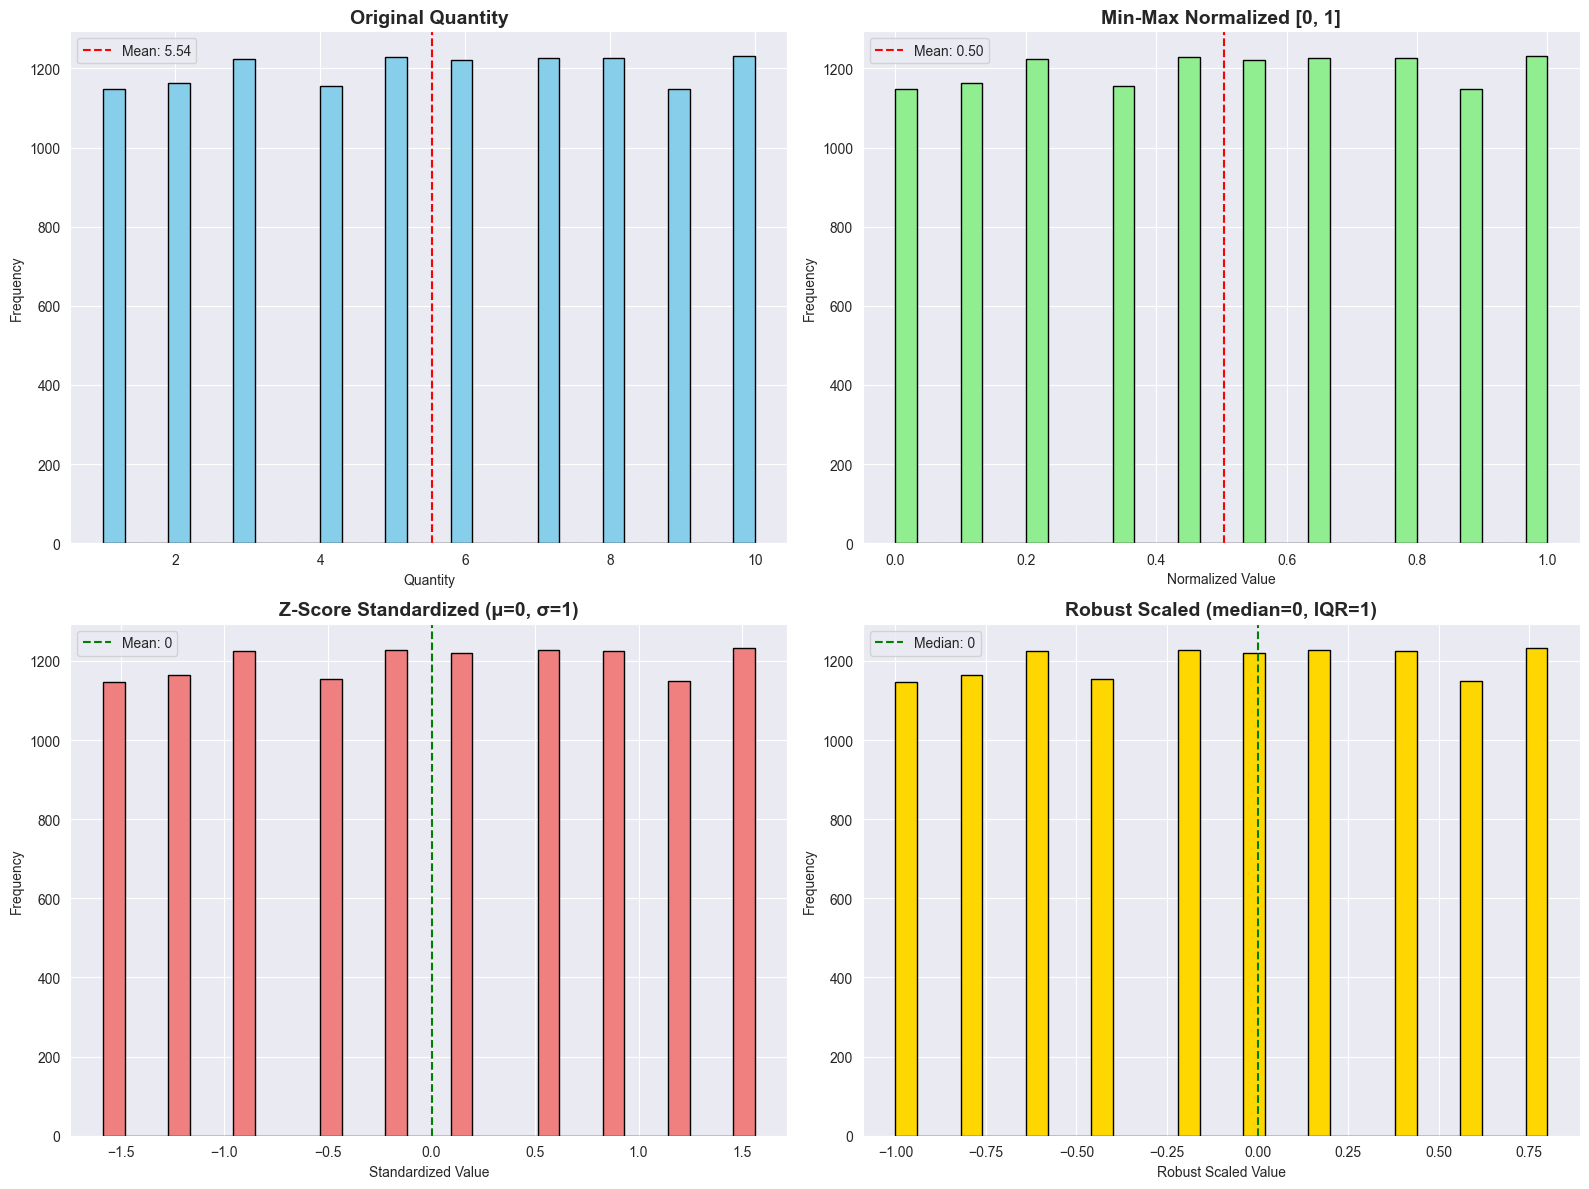

In [15]:
# Visualize all methods side by side
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original
axes[0, 0].hist(data[QUANTITY_COLUMN], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Original Quantity', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Quantity')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(data[QUANTITY_COLUMN].mean(), color='red', linestyle='--', label=f'Mean: {data[QUANTITY_COLUMN].mean():.2f}')
axes[0, 0].legend()

# Normalized
axes[0, 1].hist(data['Quantity_Normalized'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Min-Max Normalized [0, 1]', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Normalized Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(data['Quantity_Normalized'].mean(), color='red', linestyle='--', label=f'Mean: {data["Quantity_Normalized"].mean():.2f}')
axes[0, 1].legend()

# Standardized
axes[1, 0].hist(data['Quantity_Standardized'], bins=30, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Z-Score Standardized (μ=0, σ=1)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Standardized Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(0, color='green', linestyle='--', label='Mean: 0')
axes[1, 0].legend()

# Robust Scaled
axes[1, 1].hist(data['Quantity_Robust'], bins=30, color='gold', edgecolor='black')
axes[1, 1].set_title('Robust Scaled (median=0, IQR=1)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Robust Scaled Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(0, color='green', linestyle='--', label='Median: 0')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Comparison table
comparison = pd.DataFrame({
    'Method': ['Original', 'Normalization', 'Standardization', 'Robust Scaling'],
    'Column': [QUANTITY_COLUMN, 'Quantity_Normalized', 'Quantity_Standardized', 'Quantity_Robust'],
    'Min': [data[QUANTITY_COLUMN].min(), data['Quantity_Normalized'].min(),
            data['Quantity_Standardized'].min(), data['Quantity_Robust'].min()],
    'Max': [data[QUANTITY_COLUMN].max(), data['Quantity_Normalized'].max(),
            data['Quantity_Standardized'].max(), data['Quantity_Robust'].max()],
    'Mean': [data[QUANTITY_COLUMN].mean(), data['Quantity_Normalized'].mean(),
             data['Quantity_Standardized'].mean(), data['Quantity_Robust'].mean()],
    'Median': [data[QUANTITY_COLUMN].median(), data['Quantity_Normalized'].median(),
               data['Quantity_Standardized'].median(), data['Quantity_Robust'].median()],
    'Std': [data[QUANTITY_COLUMN].std(), data['Quantity_Normalized'].std(),
            data['Quantity_Standardized'].std(), data['Quantity_Robust'].std()]
})

print("COMPARISON OF ALL METHODS")
print(comparison.to_string(index=False))

## Step 5: Outlier Impact Analysis

In [ ]:
# Analyze how outliers are handled by each method
print("OUTLIER IMPACT ANALYSIS")

outlier_comparison = data[data[QUANTITY_COLUMN] > upper_fence][[
    QUANTITY_COLUMN, 'Quantity_Normalized', 'Quantity_Standardized', 'Quantity_Robust'
]].head(10)

print(outlier_comparison.to_string(index=False))

## Step 6: Save All Rescaled Datasets

In [ ]:
# Save all three versions as per assignment requirements

# 1. Normalization
df_norm = data.copy()
output_norm = OUTPUT_DIR / 'data_rescaling_norm_quantity.csv'
df_norm.to_csv(output_norm, index=False)

# 2. Standardization
df_std = data.copy()
output_std = OUTPUT_DIR / 'data_rescaling_std_quantity.csv'
df_std.to_csv(output_std, index=False)

# 3. Robust Scaling
df_robust = data.copy()
output_robust = OUTPUT_DIR / 'data_rescaling_robust_quantity.csv'
df_robust.to_csv(output_robust, index=False)


## Summary

### Methods Applied:
1. **Min-Max Normalization** -> Range [0, 1]
2. **Z-Score Standardization** -> Mean=0, Std=1
3. **Robust Scaling** -> Median=0, IQR=1

### Recommendation:
**Robust Scaling** is recommended for Quantity because:
- Handles outliers effectively (bulk purchases are valid transactions)
- Works well with right-skewed distribution
- Uses median/IQR (robust statistics)
- Preserves outlier information without distortion

### Output Files:
- `data_rescaling_norm_quantity.csv` - Min-Max Normalization
- `data_rescaling_std_quantity.csv` - Z-Score Standardization
- `data_rescaling_robust_quantity.csv` - Robust Scaling

